THIS PROJECT UNDERSTANDS HOW STUDENT'S PERFORMANCE IS AFFECTED BY OTHER VARIABLES SUCH AS GENDER, ETHNICITY, PARENTAL LEVEL OF EDUCATION,LUNCH AND TEST PREPARATION COURSE.


In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [11]:
df.shape

(1000, 8)

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


DataSet Information 
1) gender 
2) race 
3) parental level of edu 
4) lunch
5) test preparation course 
6) math score 
7) reading score 
8) writing score 
9) has 1000 rows and 8 columns 


CHECK MISSING VALUES

In [14]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


WHAT ARE THE VARIOUS COLUMNS Contents 

In [23]:
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


Adding 'Total Score' and 'Average Score'

In [24]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Lets see how marks distribution has been done 

In [29]:
highestmath=df.loc[df['math score']==100]['average'].count()
highestwriting=df.loc[df['writing score']==100]['average'].count()
highestreading=df.loc[df['reading score']==100]['average'].count()
print("Number of people with full marks in maths " + str(highestmath))
print("Number of people with full marks in reading " + str(highestreading)) 
print("Number of people with full marks in writing " + str(highestwriting))



Number of people with full marks in maths 7
Number of people with full marks in reading 17
Number of people with full marks in writing 14


In [30]:
highestmath=df.loc[df['math score']<=20]['average'].count()
highestwriting=df.loc[df['writing score']<=20]['average'].count()
highestreading=df.loc[df['reading score']<=20]['average'].count()
print("Number of people with below 20 marks in maths " + str(highestmath))
print("Number of people with below 20 marks in reading " + str(highestreading)) 
print("Number of people with below 20 marks in writing " + str(highestwriting))

Number of people with below 20 marks in maths 4
Number of people with below 20 marks in reading 1
Number of people with below 20 marks in writing 3


We can clearly see how math is the weakest subject for students. 

VISUALIZATION

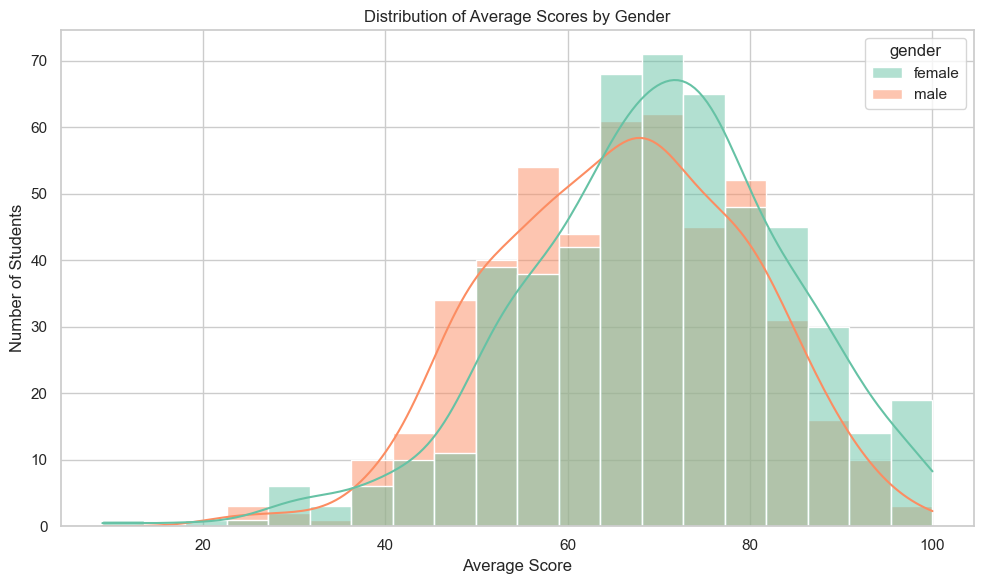

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='average', hue='gender', bins=20, kde=True, palette='Set2')

# Plot labels
plt.title("Distribution of Average Scores by Gender")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

# Show plot
plt.tight_layout()
plt.show()


We can see female students do better than male students

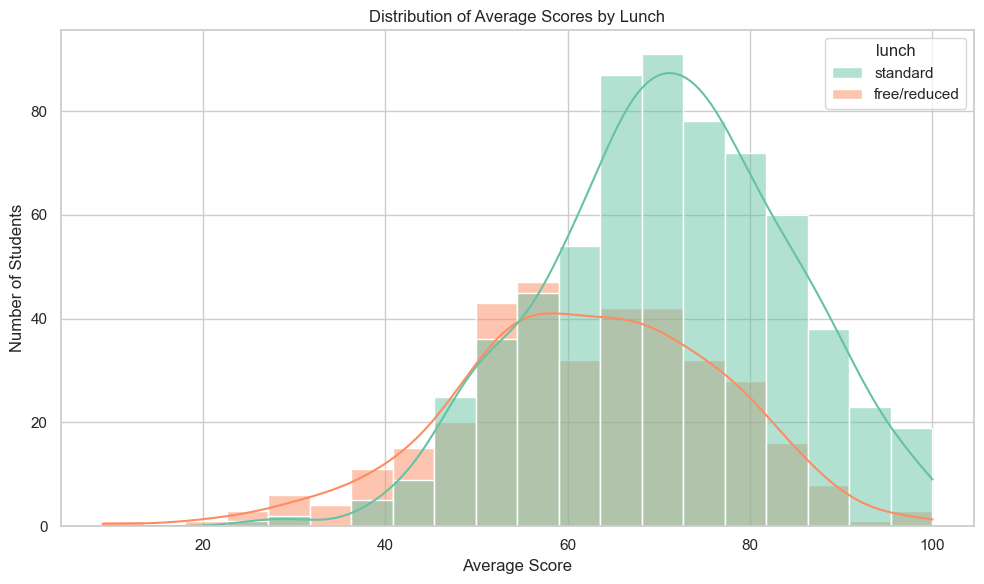

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='average', hue='lunch', bins=20, kde=True, palette='Set2')

# Plot labels
plt.title("Distribution of Average Scores by Lunch")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

# Show plot
plt.tight_layout()
plt.show()


Standard lunch heavily outperforms free lunch

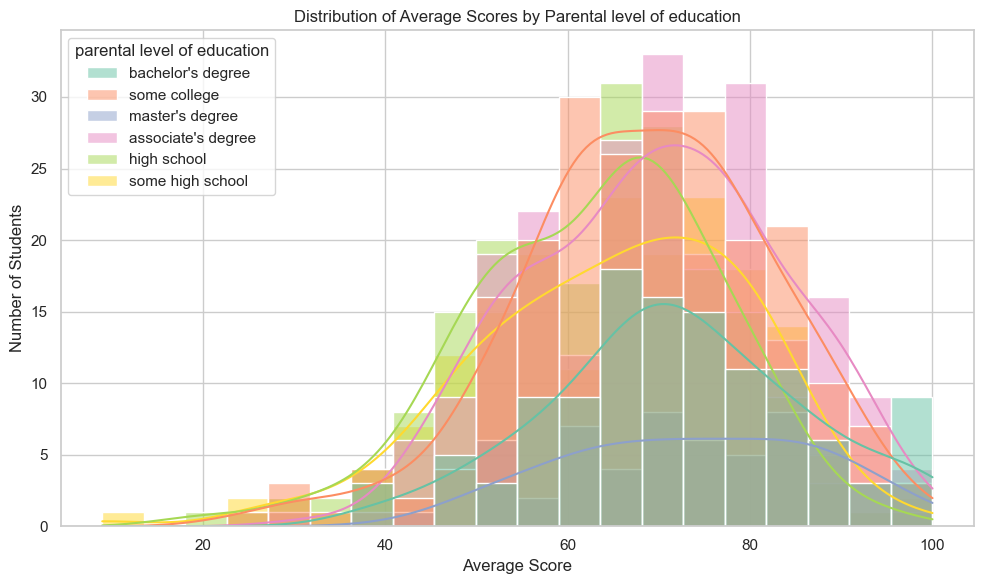

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='average', hue='parental level of education', bins=20, kde=True, palette='Set2')

# Plot labels
plt.title("Distribution of Average Scores by Parental level of education")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

# Show plot
plt.tight_layout()
plt.show()


We can see that 
1) student with parents having master's degree score the highest 
2) student with parents having some high school degree score second highest
3) student with parents having associate's degree score third highest 
4) student with parents having bachelor' degree  score fourth highest 
5) student with parents having high school degree score fifth highest 
6) student with parents having some college degree score lowest

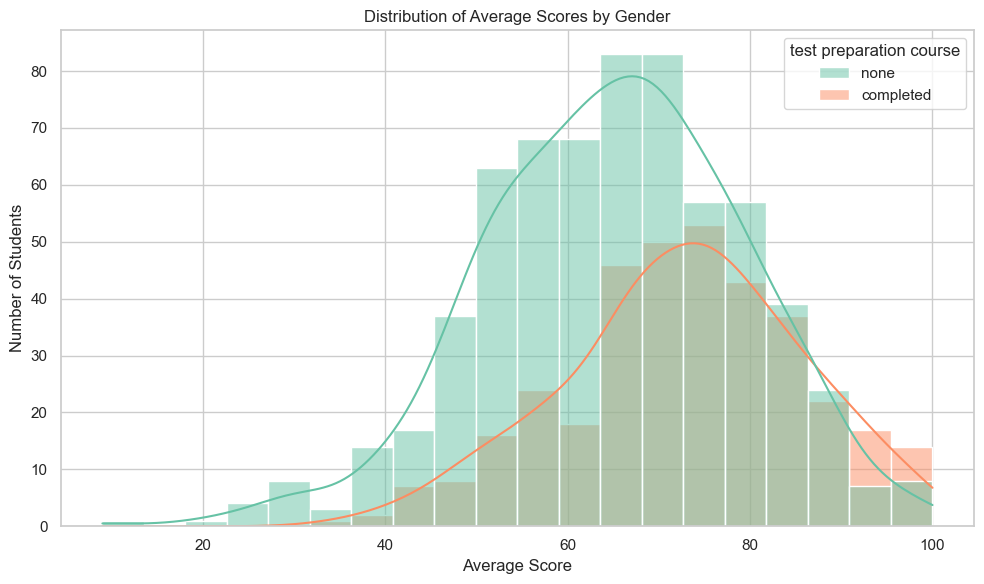

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='average', hue='test preparation course', bins=20, kde=True, palette='Set2')

# Plot labels
plt.title("Distribution of Average Scores by Gender")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

# Show plot
plt.tight_layout()
plt.show()


This shows us how completing the test preperation gives us a higher average score 

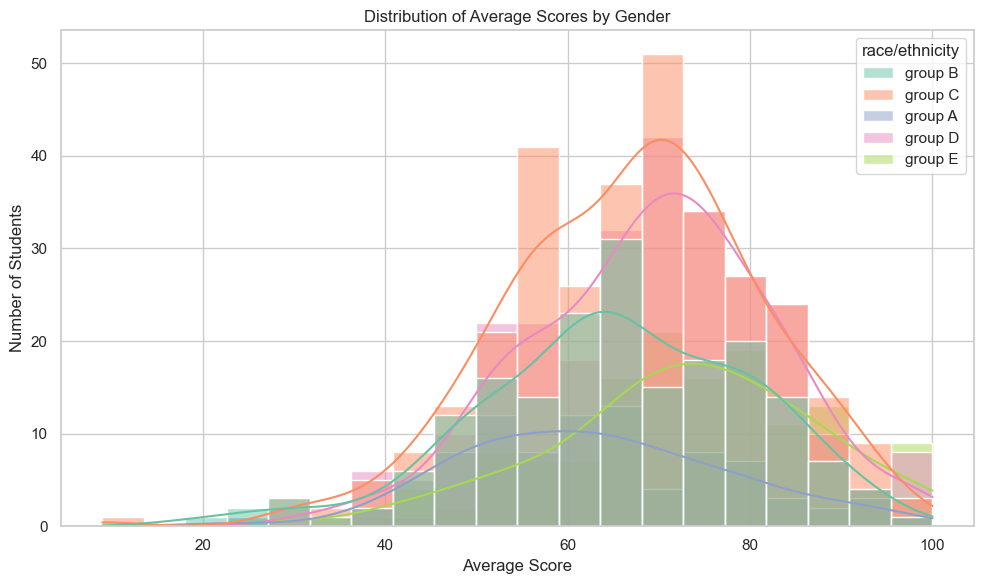

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='average', hue='race/ethnicity', bins=20, kde=True, palette='Set2')

# Plot labels
plt.title("Distribution of Average Scores by Gender")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")

# Show plot
plt.tight_layout()
plt.show()


The highest average marks are by races 
1) Group E
2) Group D
3) Group C
4) Group B
5) Group A

ONE HOT ENCODING


In [46]:
import pandas as pd

# List of categorical columns to one-hot encode
categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

# One-hot encode and clean column names
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Optional: Clean column names (remove spaces and special characters)
df_encoded.columns = df_encoded.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Show result (optional)
print(df_encoded.head())


   math_score  reading_score  writing_score  total_score    average  \
0          72             72             74          218  72.666667   
1          69             90             88          247  82.333333   
2          90             95             93          278  92.666667   
3          47             57             44          148  49.333333   
4          76             78             75          229  76.333333   

   gender_female  gender_male  race_ethnicity_group_A  race_ethnicity_group_B  \
0           True        False                   False                    True   
1           True        False                   False                   False   
2           True        False                   False                    True   
3          False         True                    True                   False   
4          False         True                   False                   False   

   race_ethnicity_group_C  ...  \
0                   False  ...   
1                 